**Creating a Line Plot with Pandas**

In [69]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")  # Ignore all warnings

In [80]:
def preprocess_data_from_url (url):
    # Load the dataset with the correct separator
    df = pd.read_csv(url, sep=';', low_memory=False)

    # Clean the 'Total' column to remove dots and convert to integer
    df['Total'] = df['Total'].str.replace('.', '').astype(int)

    # Remove "1 January" from the Periodo column
    df['Periodo'] = df['Periodo'].str.replace('1 January ', '')

    # Remove numbers before provinces or autonomous communities
    df['Autonomous Communities and Cities'] = df['Autonomous Communities and Cities'].str.split(n=1).str[1]
    df['Provinces'] = df['Provinces'].str.split(n=1).str[1]

    return df

# URL of the raw dataset on GitHub
url = 'https://github.com/nachodejuan/datasets/raw/main/Spanish-population-by-age-and-sex.csv'

# Load and tweak the data
processed_data = preprocess_data_from_url(url)

# Display the first few rows of the tweaked dataset
processed_data.head()

,National Total,Autonomous Communities and Cities,Provinces,Spanish/Foreigners,Age (year to year),Sex,Periodo,Total
0,National Total,NaN,NaN,Total,All ages,Total,2022,47475420
1,National Total,NaN,NaN,Total,All ages,Total,2021,47385107
2,National Total,NaN,NaN,Total,All ages,Total,2020,47450795
3,National Total,NaN,NaN,Total,All ages,Total,2019,47026208
4,National Total,NaN,NaN,Total,All ages,Total,2018,46722980


In [81]:
filtered_df = processed_data[(processed_data['Sex'] == 'Total') & (processed_data['Spanish/Foreigners'] == 'Total')& (processed_data['Age (year to year)'] == 'All ages')].dropna()
filtered_df = filtered_df[['Autonomous Communities and Cities', 'Provinces', 'Periodo', 'Total']]
filtered_df.head()

,Autonomous Communities and Cities,Provinces,Periodo,Total
36720,Andalucía,Almería,2022,740534
36721,Andalucía,Almería,2021,731792
36722,Andalucía,Almería,2020,727945
36723,Andalucía,Almería,2019,716820
36724,Andalucía,Almería,2018,709340


In [82]:
def calculate_annual_growth(year1, year2):
    """
    Calculate the annual growth rate for two consecutive years.

    Args:
    year1 (int): The total for the first year.
    year2 (int): The total for the second year.

    Returns:
    float: The annual growth rate.
    """
    if year1 == 0:  # Handling case where there's no previous year data
        return 0
    growth_rate = ((year2 - year1) / year1) * 100
    return growth_rate

In [83]:
# Convert Periodo to datetime
filtered_df['Periodo'] = pd.to_datetime(filtered_df['Periodo'])

# Sort the DataFrame by Periodo in descending order
filtered_df.sort_values(by=['Provinces', 'Periodo'], ascending=[True, True], inplace=True)

# Calculate the annual growth rate and add it as a new column
filtered_df['Annual Growth Rate'] = filtered_df['Total'].pct_change() * 100

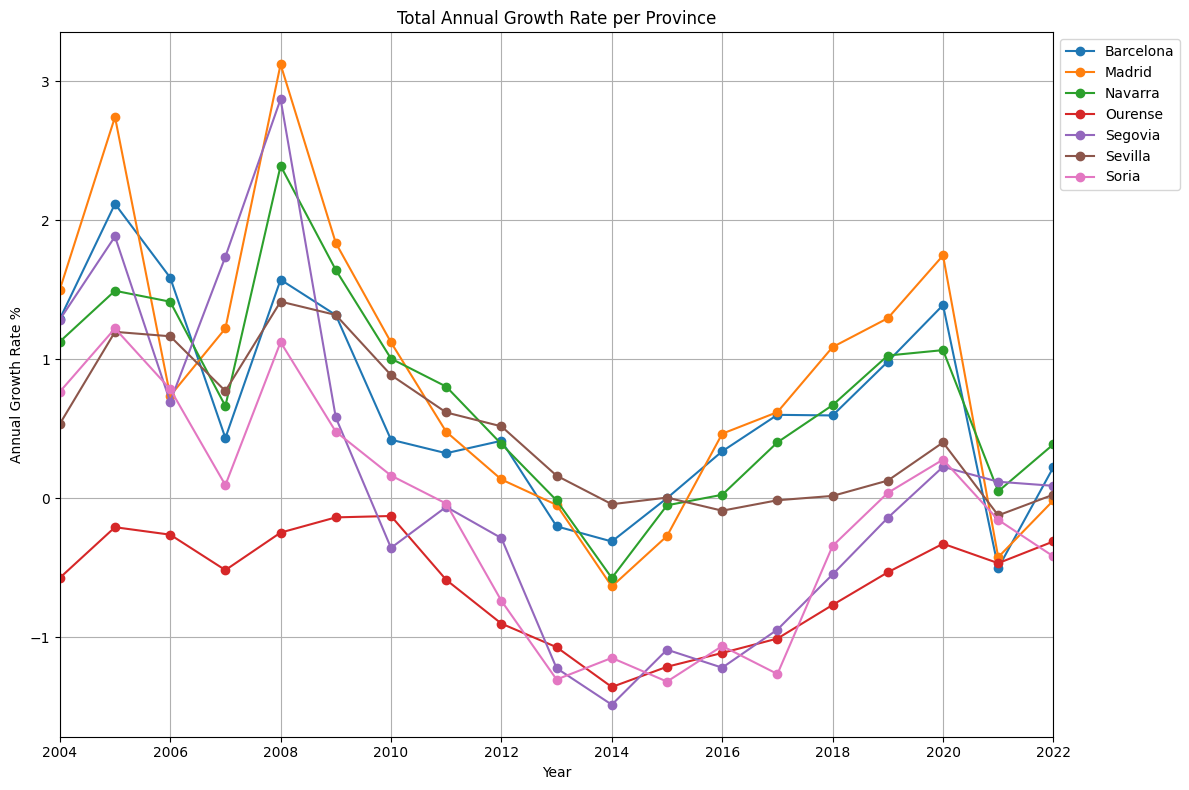

In [84]:
# Convert Periodo to datetime
filtered_df['Periodo'] = pd.to_datetime(filtered_df['Periodo'])

provinces_of_interest = ['Madrid', 'Barcelona', 'Sevilla', 'Segovia', 'Soria', 'Navarra', 'Ourense']
interest_df = filtered_df[filtered_df['Provinces'].isin(provinces_of_interest)]

interest_df = interest_df[interest_df['Periodo'].dt.year != 2003]

# Group by Provinces and Periodo, calculate mean growth rate
grouped = interest_df.groupby(['Provinces', pd.Grouper(key='Periodo', freq='Y')])['Annual Growth Rate'].mean().reset_index()

# Pivot the data for plotting
pivot_df = grouped.pivot(index='Periodo', columns='Provinces', values='Annual Growth Rate')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

for province in pivot_df.columns:
    ax.plot(pivot_df.index.year, pivot_df[province], marker='o', label=province)

ax.set_title('Total Annual Growth Rate per Province')
ax.set_xlabel('Year')
ax.set_ylabel('Annual Growth Rate %')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)

# Set x-axis limits between 2003 and 2022
ax.set_xlim(2004, 2022)
plt.tight_layout()

plt.show()

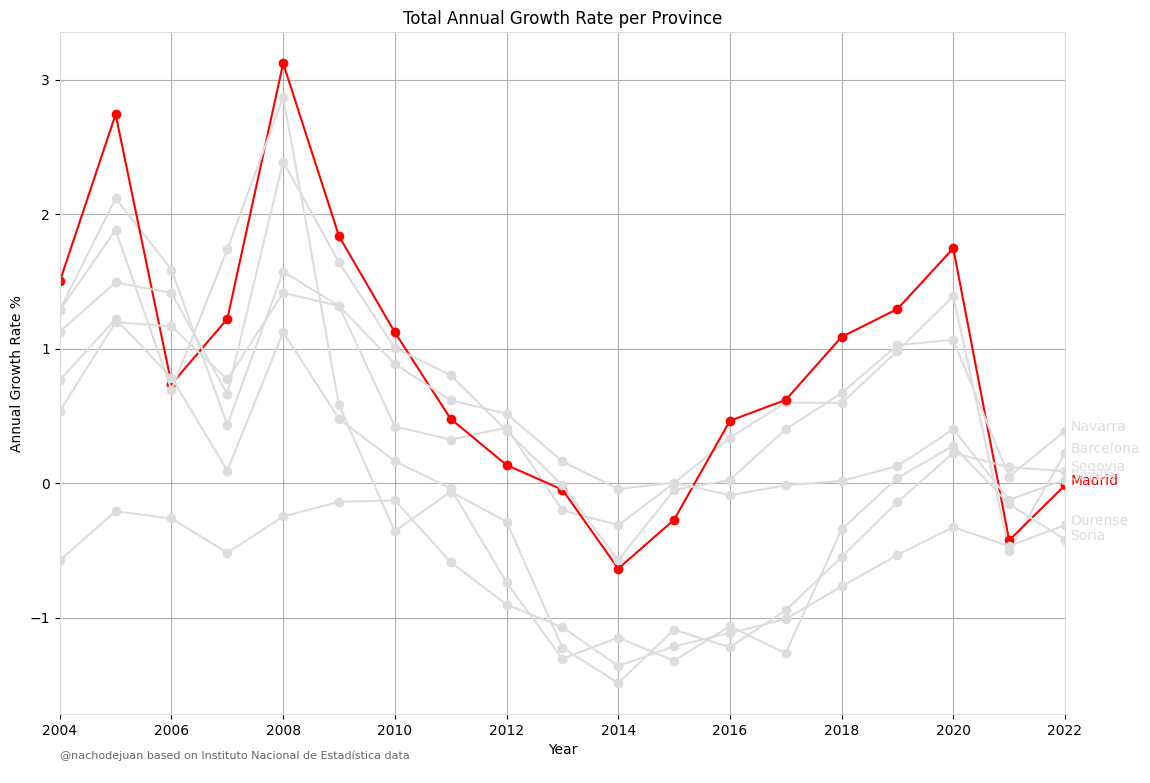

In [78]:
dark_grey = '#666'
grey = '#ddd'

# Group by Provinces and Periodo, calculate mean growth rate
grouped = interest_df.groupby(['Provinces', pd.Grouper(key='Periodo', freq='Y')])['Annual Growth Rate'].mean().reset_index()

# Pivot the data for plotting
pivot_df = grouped.pivot(index='Periodo', columns='Provinces', values='Annual Growth Rate')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each province's growth rate over time
for province in pivot_df.columns:
    color = 'red' if province == 'Madrid' else '#ddd'  # Red for Madrid, grey for others
    ax.plot(pivot_df.index.year, pivot_df[province], marker='o', color=color, label=None)

    # Annotate the data at the end of the line
    ax.text(pivot_df.index[-1].year + 0.1, pivot_df[province][-1], f'{province}', color=color)

# Title and labels
ax.set_title('Total Annual Growth Rate per Province')
ax.set_xlabel('Year')
ax.set_ylabel('Annual Growth Rate %')

# Remove legend
ax.legend().remove()

# Set x-axis limits between 2004 and 2022
ax.set_xlim(2004, 2022)

# Display grid
ax.grid(True)

for side in 'top,left,right,bottom'.split(','):
  ax.spines[side].set_color(grey)

ax.annotate('@nachodejuan based on Instituto Nacional de Estadística data',
            xy=(0,0), xytext=(.05,.03), textcoords='figure fraction',
            xycoords='figure fraction', color=dark_grey,
            fontsize=8)

# Adjust layout and display plot
plt.tight_layout()
plt.show()